In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tools.parametrize.explore import explore
from model.post.compute_results import compute_results
from model.post.plot_esq import plot_esq

In [3]:
main_path = "output/"
# search vars.json
df,paths = explore(main_path)
#
# html show 
df.style.set_properties(**{'text-align': 'left'})
df[["study","ncases","exe_cases","finished","date"]]

,study,ncases,exe_cases,finished,date
0,"[h, size_element]",12,12,True,"[2023-11-29, 19-39-48]"
1,[size_element],10,1,False,"[2023-11-30, 13-24-46]"
2,[size_element],10,10,True,"[2023-11-30, 16-04-29]"


In [5]:
id = 2
df_params,results = compute_results(df,id)


Read frd
--------------------
Error in output/2023-11-30__16-04-29__36947/2023-11-30__16-04-30__55265/simulation
Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 113.52it/s]


Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 120.49it/s]


Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 136.79it/s]


Read frd
--------------------
Error in output/2023-11-30__16-04-29__36947/2023-11-30__18-32-12__75390/simulation
Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 142.01it/s]


Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 145.79it/s]


Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 149.79it/s]


Read frd
--------------------
Interp section
--------------------
Interpolating section


100%|██████████| 64/64 [00:00<00:00, 151.95it/s]

Read frd
--------------------
Error in output/2023-11-30__16-04-29__36947/2023-11-30__19-50-25__52133/simulation


In [6]:
df_params

,size_element,sigma,sigma_max,ratio
0,0.800000,NaN,NaN,NaN
1,0.888889,7.314336,34.288078,0.213320
2,0.977778,6.344036,35.430345,0.179057
3,1.066667,6.332817,35.519333,0.178292
4,1.155556,NaN,NaN,NaN
5,1.244444,5.958452,30.915075,0.192736
6,1.333333,5.669153,32.700992,0.173363
7,1.422222,5.049124,29.502854,0.171140
8,1.511111,6.772907,40.605922,0.166796
9,1.600000,NaN,NaN,NaN


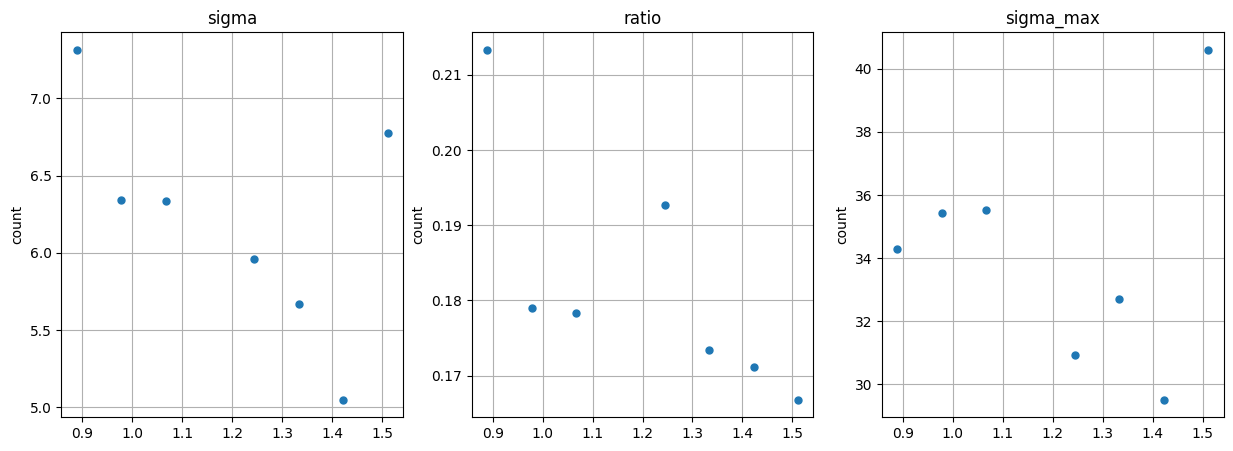

In [32]:
# plot matplotlib
fig = plt.figure()
fig.set_size_inches(15,5)
values = ["sigma","ratio","sigma_max"]
for i,value in enumerate(values):
    ax = fig.add_subplot(1,3,i+1)
    ax.plot(df_params["size_element"],df_params[value],'.',ms=10)
    plt.title(value)
    ax.set_ylabel("count")
    ax.grid()

In [10]:
from model.post.parametrize.plot_yarns import plot_yarns

No results for step 0
No results for step 4
No results for step 9


<Figure size 640x480 with 0 Axes>

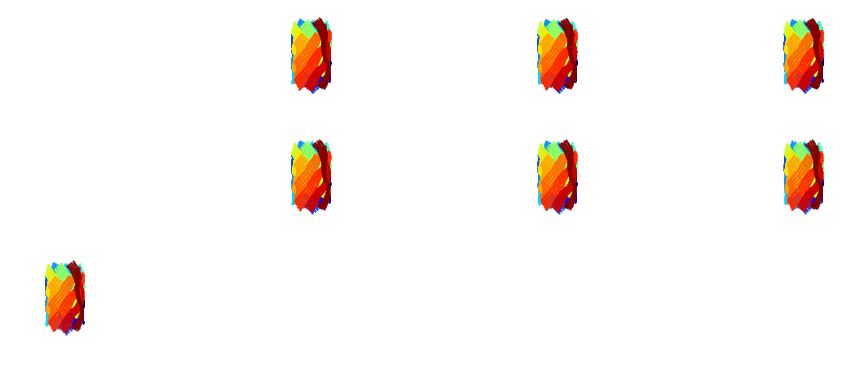

In [11]:
fig = plt.figure()
fig = plt.figure(figsize=(10,5))
plot_yarns(results,df_params)

In [12]:
[ result is None for result in results]

[True, False, False, False, True, False, False, False, False, True]

In [16]:
df_params[:-3]

,size_element,sigma,sigma_max,ratio
0,0.800000,NaN,NaN,NaN
1,0.888889,7.314336,34.288078,0.213320
2,0.977778,6.344036,35.430345,0.179057
3,1.066667,6.332817,35.519333,0.178292
4,1.155556,NaN,NaN,NaN
5,1.244444,5.958452,30.915075,0.192736
6,1.333333,5.669153,32.700992,0.173363


<Figure size 640x480 with 0 Axes>

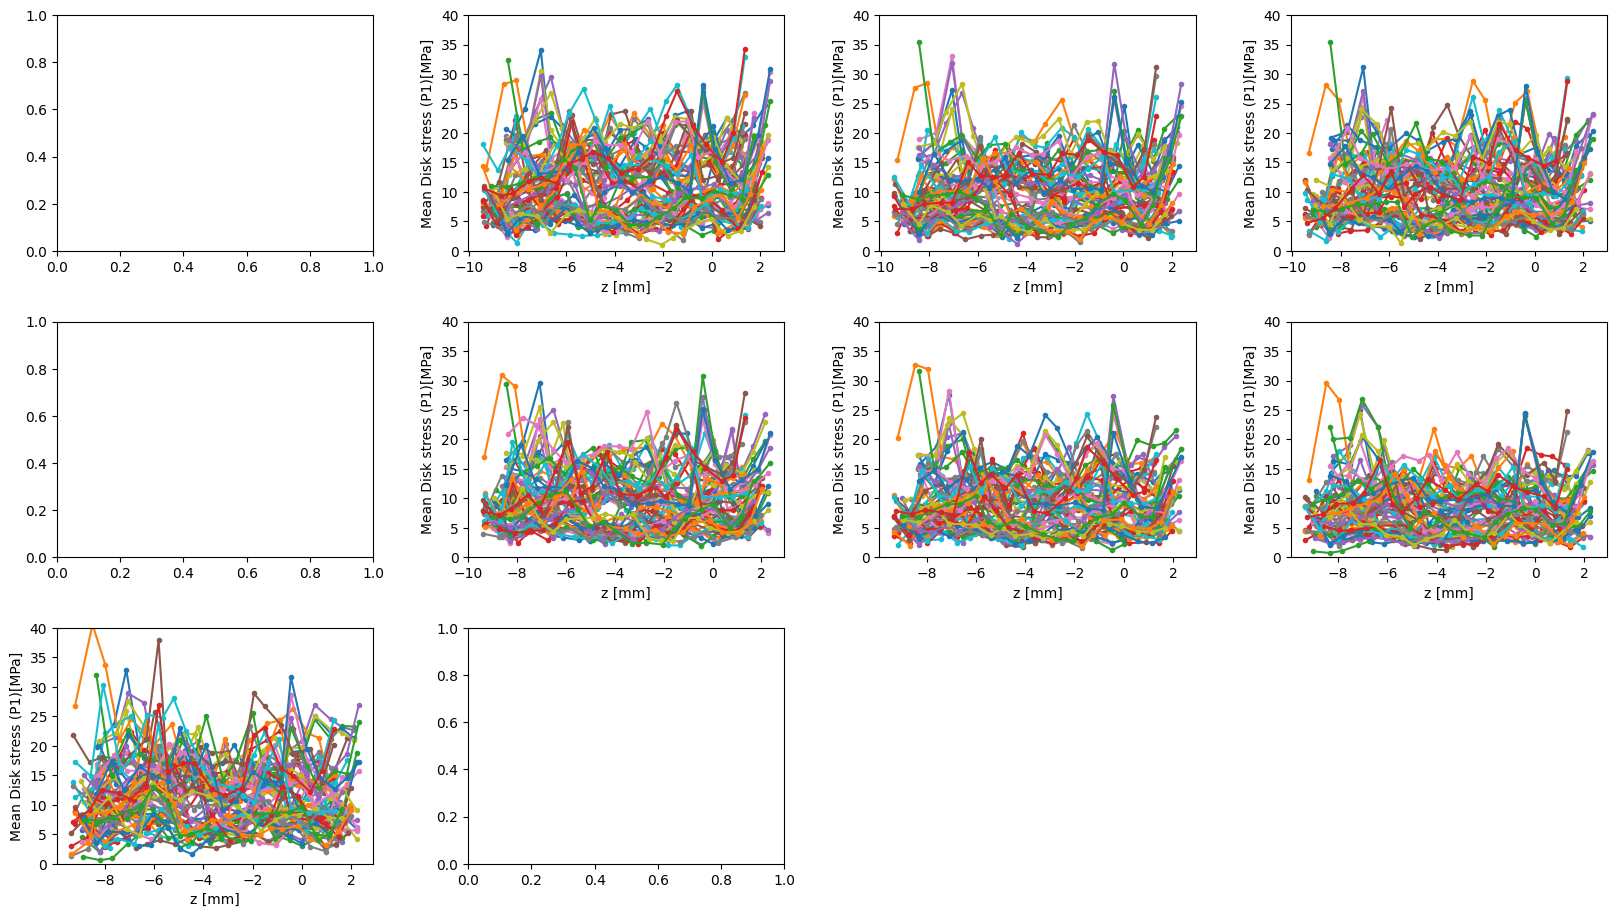

In [13]:
fig = plt.figure()
fig = plt.figure(figsize=(20,15))
# padding
plt.subplots_adjust(wspace=0.3, hspace=0.3)
nq = np.sqrt(len(results))
nq = int(np.ceil(nq))
for i in range(len(results)):
    plt.subplot(nq,nq,i+1)
    if results[i] is None:
        continue

    r = results[i]
    yarns = r["yarns"]
    json_sim = r["json_sim"]
    mt,mt_z = r["mt"],r["mt_z"]
    for iyarn in range(len(yarns)):
        z = mt_z[iyarn]
        plt.plot(z,mt[iyarn,:],'.-')
    plt.xlabel("z [mm]")
    plt.ylabel("Mean Disk stress (P1)[MPa]")
    plt.ylim([0,40])
    #title = "h={:.3f} r={:.3f} ratio={:.3f}".format(df_params["h"][i],df_params["r"][i],df_params["ratio"][i])
    #plt.title(title,fontsize=10)